 Assignment:1

Understanding textual datasets

Download any one of the text dataset mentioned in the previous lecture.

Compute tokens, types, and TTR.

Plot Zipf’s law and check if Zipf’s law holds true for meanings and lengths.
When and when not?

Plot Heaps’ law. Fit a curve and report the estimated K and β values.



In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
file = open('shakespeare.txt', 'r')
whole_text=file.read()
print(type(whole_text))

<class 'str'>


In [3]:
len_text=len(whole_text)
print('len_text:',len_text)

len_text: 5458199


In [4]:
# Now Compute Tokens
import nltk
from nltk import word_tokenize
tokens_tmp = word_tokenize(whole_text)
tokens=len(tokens_tmp)

In [5]:
print(type(tokens_tmp))
print("Tokens are:",tokens)

<class 'list'>
Tokens are: 1131197


In [6]:
# Now compute type
import numpy as np
type_tmp=np.unique(tokens_tmp)
print("Type:",len(type_tmp))

Type: 35615


In [7]:
# Now compute TTR

TTR=len(type_tmp)/tokens
print("TTR:",TTR)

TTR: 0.031484347995972405


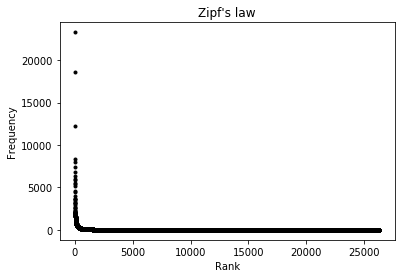

In [8]:
# Plot Zipf’s law 
import re 
import matplotlib.pyplot as plt
from nltk.probability import FreqDist

# regualar expression for word segmentation in the whole_text (can use word_tokenize(whole_text) also, but that includes different other things)
words = re.findall(r'(\b[A-Za-z][a-z]{2,9}\b)', whole_text)
 
fdist1 = FreqDist(words)
    
freq = []         
for key in fdist1.keys():
    freq.append(fdist1[key])
    
    
#print(freq)

freq = list((sorted(freq, reverse=True)))
rank=range(len(freq))  

plt.plot(rank, freq, '.k')    
plt.ylabel('Frequency')
plt.xlabel('Rank')
plt.title("Zipf's law")
plt.show()


In [9]:
# Printing the words based on ranking and frequency

from operator import itemgetter 
# Uncomment the following two lines to see the word and corresponding frequency in decreasing order
#for key, value in sorted(fdist1.items(), key = itemgetter(1), reverse=True):
#    print(key, value)

In [10]:
#  check if Zipf’s law holds true for meanings
# First randomly select some words (no_words) and their frequencies
from nltk.corpus import wordnet as wn

#stored_list=sorted(fdist1.items(), key = itemgetter(1), reverse=True)
stored_list= list(fdist1.items())

stored_list = np.array(stored_list)
np.random.seed(3)
import random
no_words=1000
random_list_idx = random.sample(range(stored_list.shape[0]), no_words)
  
selected_lists=list(stored_list[random_list_idx])
#print(selected_lists)
#print(random_list_idx)
selected_lists = list(selected_lists)



In [11]:
len(selected_lists)

1000

In [12]:
actual_word=[]
actual_word_freq=[]
for w in selected_lists:
    actual_word.append(w[0])
    actual_word_freq.append(w[1])
    
#print(actual_word)
#print(actual_word_freq)
len(actual_word)

1000

In [13]:
synonyms_len=[] # this will define meaning
synonyms=[]
for w1 in actual_word:
    tmp_syn = []
    for syn in wn.synsets(w1):
        for l in syn.lemmas():
            tmp_syn.append(l.name())
    synonyms.append(tmp_syn)
    synonyms_len.append(len(set(tmp_syn)))


#print(synonyms)     
#print(synonyms_len)    



In [14]:
print(actual_word[0])
print(wn.synsets(actual_word[0]))
print(set(synonyms[0]))

brow
[Synset('brow.n.01'), Synset('eyebrow.n.01'), Synset('hilltop.n.01')]
{'supercilium', 'brow', 'forehead', 'eyebrow', 'hilltop'}


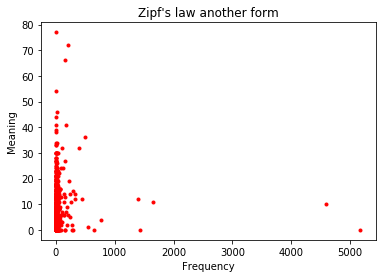

In [15]:
plt.plot(actual_word_freq, synonyms_len, '.r')    
plt.ylabel('Meaning')
plt.xlabel('Frequency')
plt.title("Zipf's law another form")
plt.show()

In [16]:
# Zipf’s law for lengths
freq=[]
word_len=[]
for key, value in sorted(fdist1.items(), key = itemgetter(1), reverse=True):
    freq.append(value)
    word_len.append(len(key))


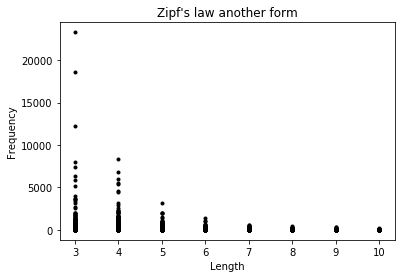

In [17]:
plt.plot(word_len, freq, '.k')
plt.ylabel('Frequency')
plt.xlabel('Length')
plt.title("Zipf's law another form")
plt.show()

# Plot Heaps’ law. Fit a curve and report the estimated K and β values.
How does the size of the overall vocabulary (number of unique words) grow
with the size of the corpus?
Heaps’ Law
Let |V| be the size of vocabulary and N be the number of tokens.

|V| = KN^β

Typically
K ≈ 10-100
β ≈ 0.4 - 0.6 (roughly square root)



In [18]:
from nltk.tokenize import sent_tokenize

In [19]:
sent_tokenize_list = sent_tokenize(whole_text)

In [20]:
print(type(sent_tokenize_list))

<class 'list'>


In [21]:
#sent_tokenize_list
#np.unique(np.array(word_tokenize(sent_tokenize_list[0])))

In [22]:
unique_words = []
total_words = []
for sentenance in sent_tokenize_list:
    tokens_words = word_tokenize(sentenance)
    unique_words.append(np.unique(np.array(tokens_words)).shape[0])
    total_words.append(len(tokens_words))

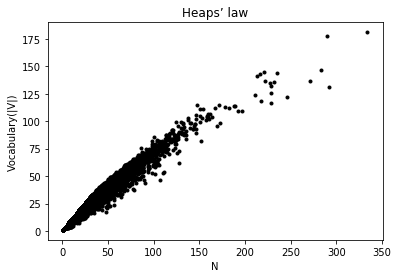

In [23]:
plt.plot(total_words, unique_words, '.k')
plt.ylabel('Vocabulary(|V|)')
plt.xlabel('N')
plt.title("Heaps’ law")
plt.show()

In [24]:
# Estimating K and beta
# Reference: https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html
total_words = np.array(total_words)
unique_words = np.array(unique_words)

In [25]:
from scipy.optimize import curve_fit

In [26]:
def func(x, k, b):
    return k * (x**b)

In [27]:
popt, pcov = curve_fit(func, total_words, unique_words,bounds=([0., 0.2], [100., 1]))
popt

array([ 1.33681043,  0.8647798 ])

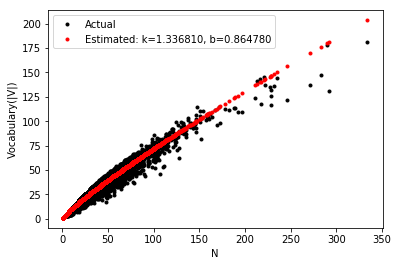

In [28]:
plt.plot(total_words, unique_words, '.k', label = 'Actual')
plt.plot(total_words, func(total_words, *popt), '.r',
         label='Estimated: k=%f, b=%f' % tuple(popt))

plt.ylabel('Vocabulary(|V|)')
plt.xlabel('N')
plt.legend()
plt.show()